<center>

## **Lab 1**

# **Data Preprocessing**

</center>

### **Student information**

**Student's name**: Nguyễn Công Tuấn

**Student's ID**: 22127436

**Class** 22KHDL1

### **Self-evaluation of the assignment requirements**

<center>

| **No.** | **Details** | **Evaluation** |
| --- | --- | --- |
| 1 | Data Cleaning | 100% | 
| 2 | Features Selection | 100% |
| 3 | Data Normalization | 100% |
| 4 | Data Discretization | 100% |
| 5 | Detailed explanation of each step. Illustrative images, diagrams and equations are required | 100% |
| 6 | Each processing step must be fully commented, and results should be printed for observation | 100% |
| 7 | The report needs to be well-formatted | 100% |
| 8 | Before submitting, re-run the notebook (Kernel → Restart & Run All) | 100% |
| 9 | Reference (if any) | 100% |

</center>

In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
adult = fetch_ucirepo(id=2) 

In [4]:
X = adult.data.features 
y = adult.data.targets 
  
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


The dataset contains ***48842*** records and ***14*** columns in ***feature dataset*** and ***48842*** records and ***1*** columns in ***target dataset***. 

Because both of them have a same records so I can merge them by column.

In [7]:
X = pd.concat([X, y], axis=1)

X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **Data Cleaning**

The data is dirty in the real world with lots of potential incorrect data from **human mistakes**, **computing errors** or **transmission problems**. And that’s why data needs preprocessing to ensure the accuracy and reliability of later analyses.

To perform data cleaning tasks, let’s answer the questions and address the problems below:


## **Assessment of Missing Data**

### Question: *Is there any missing data present?* 

In [8]:
missing_data = X.isna().sum()
print("Missing data per column:\n", missing_data)

Missing data per column:
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


**Conclusion**: The Adult Census Income dataset contains the missing data in the ***workclass***, ***occupation*** and ***native-country*** columns.

In [9]:
for col in ["workclass", "occupation", "native-country"]:
    print(f"Unique values in {col}:")
    print(X[col].unique())
    print("-" * 50)

Unique values in workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
--------------------------------------------------
Unique values in occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]
--------------------------------------------------
Unique values in native-country:
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hun

When printing out all the unique values of each column, I notice the ***?*** value. Therefore, I consider the ***?*** value as the ***NaN*** value.

In [10]:
X = X.replace('?', np.nan) # replace '?' with NaN

missing_data = X.isna().sum()
print("Missing data per column:\n", missing_data)

Missing data per column:
 age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


After changing the ***?*** value to the ***NaN*** value, the number of missing data per column increases a lot. 

### Question: *If so, what actions should be taken and why?*

- *Should the affected records be excluded from the dataset?*

In [11]:
before_drop = X.shape[0]  # Number of rows before dropping
after_drop = X.dropna().shape[0]  # Number of rows after dropping

rows_deleted = before_drop - after_drop

print("Number of rows before dropping:", before_drop)
print("Number of rows deleted:", rows_deleted)
print("Number of rows after dropping:", after_drop)
print("Percentage of rows deleted:", (rows_deleted / before_drop) * 100)

Number of rows before dropping: 48842
Number of rows deleted: 3620
Number of rows after dropping: 45222
Percentage of rows deleted: 7.411653904426519


If trying to remove the missing data records, it means I will remove the total ***3620*** records (approximately 7.41% of the dataset). Therefore, I can lost some valuable data, especially since the dataset is moderate in size

**Conclusion**: Not exclude or drop the affected records from the dataset

- *Should the missing values be imputed? If so, which imputation methods will be applied (e.g., global constant, mean, etc.)?*

In this case, these columns (***workclass***, ***occupation*** and ***native-country***) are categories so
- Can not use ***mean*** and ***median*** because they are used for numerical data.
- If replacing missing values with the ***mode*** (most frequent value), it might introduce bias and misrepresent the actual distribution of data.
- If using the global constant like ***Unknown***, it means I acknowledge that I do not have that information rather than making a possibly incorrect assumption.

**Best choice**: Replacing missing values with ***Unknown*** to ensure that I retain as much data as possible while indicating uncertainty and that allow machine learning models to treat it as a separate category rather than making incorrect assumptions.

In [12]:
X = X.fillna({"workclass": "Unknown", "occupation": "Unknown", "native-country": "Unknown"})

Checking the result of X after filling ***?*** value with ***NaN*** value.

In [13]:
for col in ["workclass", "occupation", "native-country"]:
    print(f"Unique values in {col}:")
    print(X[col].unique())
    print("-" * 50)

Unique values in workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------
Unique values in occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
--------------------------------------------------
Unique values in native-country:
['United-States' 'Cuba' 'Jamaica' 'India' 'Unknown' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ire

Now, I can see all missing value (***NaN*** value) have already replaced with ***Unknown***.

## **Identification of Duplicate Records**

### Question: *Are there any duplicate records present in dataset? If duplicates, exist, keep only one of them*

In [14]:
print("Number of duplicated rows:", X.duplicated().sum()) 

Number of duplicated rows: 29


In [15]:
print("Number of records before dropping the duplicates:", X.shape[0])

X = X.drop_duplicates(keep="first")

print("Number of records after dropping the duplicates:", X.shape[0])

Number of records before dropping the duplicates: 48842
Number of records after dropping the duplicates: 48813


## **Additional Data Cleaning Methods**

### Question: *Are there any further steps, methods that can be implemented to make the data to be more cleaner?*

In [16]:
for col in X.columns:
    print(f"Unique values in {col}:")
    print(X[col].unique())
    print("-" * 50)

Unique values in age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
--------------------------------------------------
Unique values in workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------
Unique values in fnlwgt:
[ 77516  83311 215646 ... 173449  89686 350977]
--------------------------------------------------
Unique values in education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
--------------------------------------------------
Unique values in education-num:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
-----------------------------------------

***Converting categorical columns to lowercase***

In [17]:
X = X.apply(lambda col: col.str.lower() if col.dtype == 'object' else col)

***Reformat the target (income)***

In [18]:
X['income'].unique()

array(['<=50k', '>50k', '<=50k.', '>50k.'], dtype=object)

In [19]:
X['income'] = X['income'].replace({'>50k.': '>50k', '<=50k.': '<=50k'})

***Converting income columns to binary (0 and 1)***

In [20]:
X['income'] = X['income'].map({'<=50k': 0, '>50k': 1})

# **Features Selection**

Complex data analysis can **take a significant amount of time to execute on the complete dataset**. Higher dimensions make data more sparse and create exponentially more subspace combinations, but these combinations often lack meaning. Therefore, features selection is **an important step in data preprocessing** that simplifies the dataset while retaining its most essential characteristics, allowing for more efficient modeling and visualization.

To perform features selection, let’s address the following questions:

## **Feature Selection**

### Question: *Which features (attributes) are the most informative in the data? Why? Which features should be kept in the dataset?* 

In [21]:
print(X.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


### **My first thought**

Based on **data-driven insights** combined with an **logical understanding of how features relate to income**, I will have a little insights about which  are the most informative features (attributes) in the dataset. 

Here is my evaluation of each feature based on its relevance to income prediction:

<center>

| Feature | Importance | Reason | Status |
| ---- | ---- | ---- | ---- |
|  *education-num* | Highly informative | Higher education levels often lead to better job opportunities and higher earnings | Keep |
| *occupation* | Highly informative | Certain occupations, especially specialized or high-level positions, typically offer higher salaries  | Keep |
| *hours-per-week* | Highly informative | More hours worked generally result in higher earnings | Keep | 
| *capital-gain* | Highly informative | Investment returns contribute directly to total income, increasing overall wealth | Keep |
| *capital-loss* | Highly informative | Represents financial losses that directly impact net income | Keep |
| *age* | Moderately information | Older individuals tend to have more work experience and industry knowledge, which can lead to higher earnings | Keep | 
| *marital-status* | Weak predictor | Marital status does not directly influence an individual’s skills or job performance | Drop | 
| *sex* | Weak predictor | Income is primarily determined by skills, experience, and effort, making sex a less significant factor | Drop |
| *race* | Weak predictor | While race can influence social factors, it does not inherently determine an individual's earning potential | Drop |
| *native-country* | Weak predictor | While country of origin may impact opportunities, education, skills, and experience are stronger income predictors | Drop |
| *relationship* | Redundant | This feature is closely related to marital status, making it unnecessary | Drop |
| *education* | Redundant | Education level is already represented numerically by education-num, making this feature redundant	 | Drop |
| *fnlwgt* | Not useful | This is a population weighting factor used for survey analysis, not a meaningful predictor of individual income | Drop |

</center>

### **Verify by Information Theory**

To verify the correctness of my assumptions about feature importance, I need a reliable method to quantify how much each feature contributes to predicting income.

**Information theory** provides a statistical method for this: **Mutual Information (MI)**. This method measures the dependency between a feature and the target variable or how much knowing a feature reduces uncertainty about predicting the target variable (income).

Since all features in the dataset are discrete $\rightarrow$ use the MI formula for discrete variables:

$$I(X, Y) = \sum_{y \in \mathcal{Y}}\sum_{x \in \mathcal{X}}P_{X, Y}(x, y) \log \left( \frac{P_{X, Y}(x, y)}{P_{X}(x) P_{Y}(y)} \right)$$


and it captures how much information is shared between a random variable (feature) $X$ and the random variable (target) $Y$.

Even though the numerical columns in dataset are discrete, they have a large number of unique values $\Rightarrow$ Inflates the mutual information (MI) score and make these features seem more important than they actually are.

In [22]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop("income", errors='ignore')

for col in numerical_cols:
    print(f"{col} has {X[col].nunique()} unique values")
    print(f"Unique values in {col}:")
    print(np.sort(X[col].unique()))
    print("-" * 50)

age has 74 unique values
Unique values in age:
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90]
--------------------------------------------------
fnlwgt has 28523 unique values
Unique values in fnlwgt:
[  12285   13492   13769 ... 1455435 1484705 1490400]
--------------------------------------------------
education-num has 16 unique values
Unique values in education-num:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
--------------------------------------------------
capital-gain has 123 unique values
Unique values in capital-gain:
[    0   114   401   594   914   991  1055  1086  1111  1151  1173  1264
  1409  1424  1455  1471  1506  1639  1731  1797  1831  1848  2009  2036
  2050  2062  2105  2174  2176  2202  2228  2290  2329  2346  2354  2387
  2407  2414  2463  2538  2580  2597  2635  2653  2829  2885 

Besides that when a feature is highly skewed, MI can become misleading or ineffective because skewed data causes poor binning. 

In [23]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.drop('income')

# Compute skewness for each numerical column
skewness_values = X[numerical_cols].skew()

# Define threshold for high skewness
highly_skewed_features = skewness_values[abs(skewness_values) > 1] 

print("Highly Skewed Features (|skewness| > 1):")
print(highly_skewed_features.sort_values(ascending=False))

Highly Skewed Features (|skewness| > 1):
capital-gain    11.891093
capital-loss     4.568263
fnlwgt           1.439534
dtype: float64


From the result of computing skewness for each numerical columns, these *capital-gain*, *capital-loss* and *fnlwgt* features are highly skewed features.

To be specific, there are 2 binning methods and if a feature is skewed, 2 binning methods will fail:
- **Equal-width binning** - Most values go into a few bins and make MI almost 0
- **Equal-frequency binning** - Too many bins may have too few samples and lead to unstable MI estimates

**Conclusion**: I have to handle skewed data before MI computation.

In [24]:
for col in ["capital-gain", "capital-loss"]:
    zero_count = (X[col] == 0).sum()  # Count number of zeros
    total_count = len(X[col])  # Total number of rows
    zero_proportion = zero_count / total_count  # Compute proportion

    print(f"Proportion of 0s in {col}: {zero_proportion:.4f} ({zero_count}/{total_count})")

Proportion of 0s in capital-gain: 0.9173 (44778/48813)
Proportion of 0s in capital-loss: 0.9533 (46531/48813)


**Approach**:

**Step 1** _ Apply $\log$ transformation (to handle zero values in *capital-gain* and *capital-loss*)

**Step 2** _ Bin the features:
- Binning *the non-skewed numerical features* into categories by using **equal-frequency binning**
- Binning *the skewed numerical features* by using **custom binning** (zero values remain in one bin to avoid overwhelming MI with zero dominance and non-zero values are binned separately) 

**Step 3** _ Compute the mutual information (MI)

In [25]:
X_encoded = X.copy()

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.drop("income")

for col in categorical_cols:
    X_encoded[col] = X_encoded[col].astype('category').cat.codes

# Step 1: Apply log transformation to capital-gain and capital-loss
X_encoded["capital-gain"] = np.log1p(X_encoded["capital-gain"])
X_encoded["capital-loss"] = np.log1p(X_encoded["capital-loss"])

# Step 2: Discretize / Binning numerical variables
for col in numerical_cols:
    if col in ["capital-gain", "capital-loss"]:
        # Compute unique bin edges to avoid duplicates
        bin_edges = sorted(set([-1, 0, 
                                X_encoded[col].quantile(0.25), 
                                X_encoded[col].quantile(0.5), 
                                X_encoded[col].quantile(0.75), 
                                X_encoded[col].max()]))

        X_encoded[col] = pd.cut(X_encoded[col], bins=bin_edges, labels=False, duplicates='drop')
    else:
        X_encoded[col] = pd.qcut(X_encoded[col], q=10, duplicates='drop', labels=False)

# Compute Mutual Information
def mutual_info(target, features):
    mi_scores = {}

    for col in features:
        joint = pd.crosstab(X_encoded[col], X_encoded[target])
        total = joint.values.sum()

        prob_x = joint.sum(axis=1).values / total  
        prob_y = joint.sum(axis=0).values / total  
        prob_xy = joint / total  

        mi = np.nansum(prob_xy * np.log2(prob_xy / (prob_x[:, np.newaxis] * prob_y ) + 1e-10))
        mi_scores[col] = mi

    return mi_scores

mi_scores = mutual_info("income", X_encoded.columns.drop("income"))

mi_df = pd.DataFrame(list(mi_scores.items()), columns=["Feature", "Mutual Information"])
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False)

print("Mutual Information Scores:")
print(mi_df.to_string(index=False))


Mutual Information Scores:
       Feature  Mutual Information
  relationship            0.165409
marital-status            0.156963
           age            0.093383
     education            0.092127
    occupation            0.091894
 education-num            0.087221
hours-per-week            0.055459
  capital-gain            0.042762
           sex            0.036695
     workclass            0.022300
  capital-loss            0.011425
          race            0.008200
native-country            0.008165
        fnlwgt            0.000733


From the **Mutual Information (MI) scores**, the most informative features are those with the **highest MI values** as they provide the most information about the target (income) and I can
- **Keep features** - *relationship*, *marital-status*, *age*, *education*, *occupation*, *education-num*, *hours-per-week*, *sex*, *workclass*, *capital-gain* and *capital-loss*
- **Drop features** - *race*, *native-country* and *fnlwgt* 

In [26]:
X = X.drop(columns=["fnlwgt", "race", "native-country"])

Question: *Are there any features that are redundant or highly correlated with others? If so, which methods (e.g., correlation thresholding, Variance Inflation Factor) will be used to eliminate these features?* 

To find out any features that are redundant or highly correlated with other, I use
- **Pearson correlation** for numerical features 
- **Cramer's V** for categorical features 

$$V = \sqrt{\frac{\frac{\mathcal{X}^2}{n}}{\min(k-1, r- 1)}}$$

where:
- $\mathcal{X}^2$ is derived from Pearson's chi-squared test
- $n$ is the grand total of observations
- $k$ being the number of columns (features)
- $r$ being the number of rows (records)

and the Pearson's chi-squared test is

$$\mathcal{X}^2 = \sum \frac{(O - E)^2}{E}$$

where 

- $\mathcal{X}^2$ is derived from Pearson's chi-squared test
- $O$ is the observed frequency
- $E$ is the expected frequency

In [27]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

X_encoded = X.copy()
for col in categorical_cols:
    X_encoded[col] = X_encoded[col].astype('category').cat.codes

# Function to compute Cramér's V manually (for categorical features)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y).values 
    chi2 = np.sum((confusion_matrix - confusion_matrix.sum(axis=1, keepdims=True) * 
                   confusion_matrix.sum(axis=0, keepdims=True) / confusion_matrix.sum())**2 /
                   (confusion_matrix.sum(axis=1, keepdims=True) * confusion_matrix.sum(axis=0, keepdims=True) / confusion_matrix.sum()))
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r - 1, k - 1)) if min(r - 1, k - 1) > 0 else 0  

# Compute Pearson correlation for numerical features
numerical_corr = X_encoded[numerical_cols].corr()

# Compute Cramér’s V for categorical features
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0 
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(X_encoded[col1], X_encoded[col2])

# Convert to numeric type
cramers_v_matrix = cramers_v_matrix.astype(float)


full_corr_matrix = pd.DataFrame(index=X_encoded.columns, columns=X_encoded.columns, dtype=float)

# Fill numerical correlation values
for col1 in numerical_cols:
    for col2 in numerical_cols:
        full_corr_matrix.loc[col1, col2] = numerical_corr.loc[col1, col2]

# Fill Cramér's V values for categorical features
for col1 in categorical_cols:
    for col2 in categorical_cols:
        full_corr_matrix.loc[col1, col2] = cramers_v_matrix.loc[col1, col2]

# Fill correlations between categorical & numerical using Pearson (since numeric encoding is used)
for col1 in categorical_cols:
    for col2 in numerical_cols:
        full_corr_matrix.loc[col1, col2] = X_encoded[col1].corr(X_encoded[col2])
        full_corr_matrix.loc[col2, col1] = full_corr_matrix.loc[col1, col2] 

print("Full Correlation Matrix (Numerical: Pearson, Categorical: Cramér's V):")
print(full_corr_matrix)

Full Correlation Matrix (Numerical: Pearson, Categorical: Cramér's V):
                     age  workclass  education  education-num  marital-status  \
age             1.000000   0.052968  -0.015176       0.030760       -0.263866   
workclass       0.052968   1.000000   0.100016      -0.045938        0.085458   
education      -0.015176   0.100016   1.000000       0.359652        0.090958   
education-num   0.030760  -0.045938   0.359652       1.000000       -0.069911   
marital-status -0.263866   0.085458   0.090958      -0.069911        1.000000   
occupation      0.006754   0.400082   0.186593       0.045096        0.131642   
relationship   -0.263416   0.100813   0.122585      -0.090672        0.488163   
sex             0.088073   0.151771   0.093309       0.009284        0.459477   
capital-gain    0.077221   0.012044   0.028944       0.125186       -0.043954   
capital-loss    0.056908  -0.004671   0.017654       0.080969       -0.033840   
hours-per-week  0.071322  -0.078086   

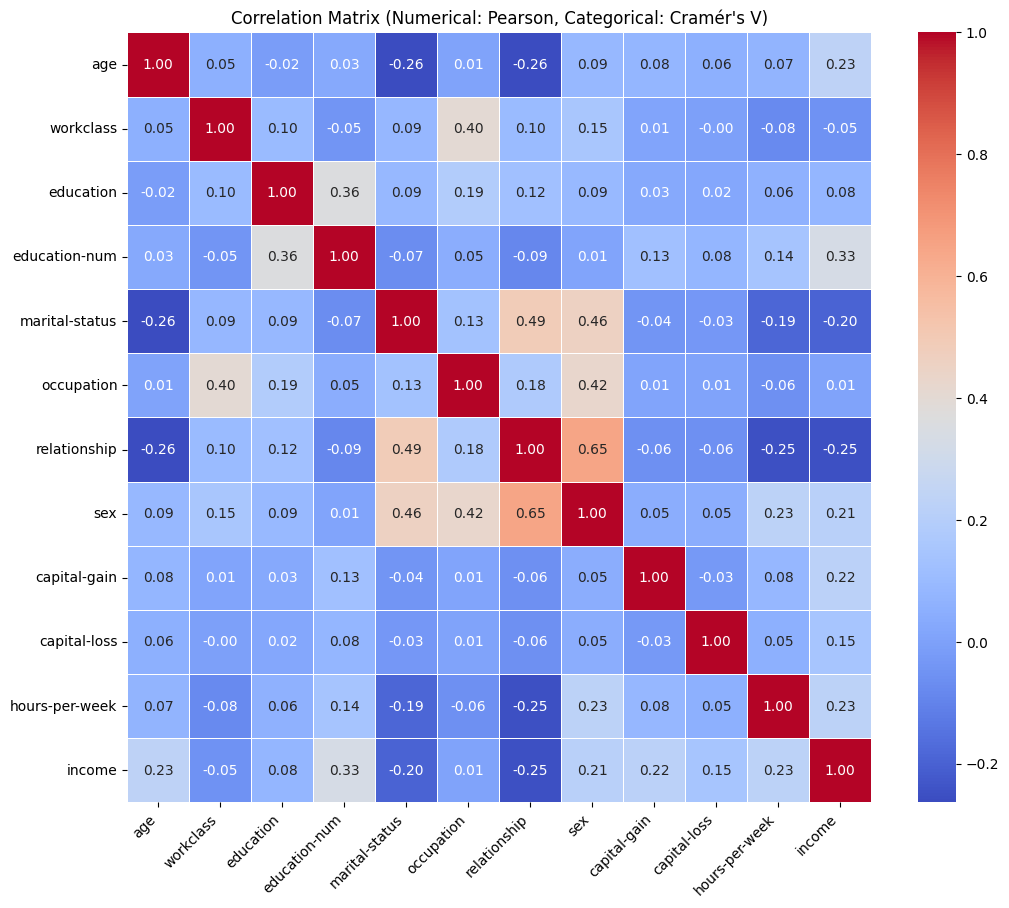

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(full_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix (Numerical: Pearson, Categorical: Cramér's V)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

From the result of **Pearson correlation** and **Cramer's V**, the redundant or highly correlated features are those with the **highest correlated values** and I can find out these redundant features:
- *workclass* and *occupation* (0.400082)
- *education* and *education-num* (0.359652)
- *marital-status* with *relationship* and *sex* (0.488163 and 0.459477)  
- *sex* and *relationship* (0.646642)
- *sex* and *occupation*  (0.424054)


**Drop redundant features** - *workclass*, *education*, *sex* and *relationship* 

In [29]:
X = X.drop(columns=["workclass", "education", "sex", "relationship"])

Question: *How many features should be retained to ensure minimal information loss?*

After using Mutual Information (MI) to find out the most informative features and using Pearson's correlation and Cramer's V to determine the redundant features, I can conclude that there are 6-8 features should be retained to ensure minimal information loss

# **Data Normalization**

Data normalization is a critical step in data preprocessing, where the values of features are scaled to a common range. This ensures that no single feature disproportionately influences the analysis.

To perform data normalization, let’s address the following questions:

## **Need for Normalization**

### Question: *Does the data contain features with different scales?*

In [30]:
X.columns

Index(['age', 'education-num', 'marital-status', 'occupation', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income'],
      dtype='object')

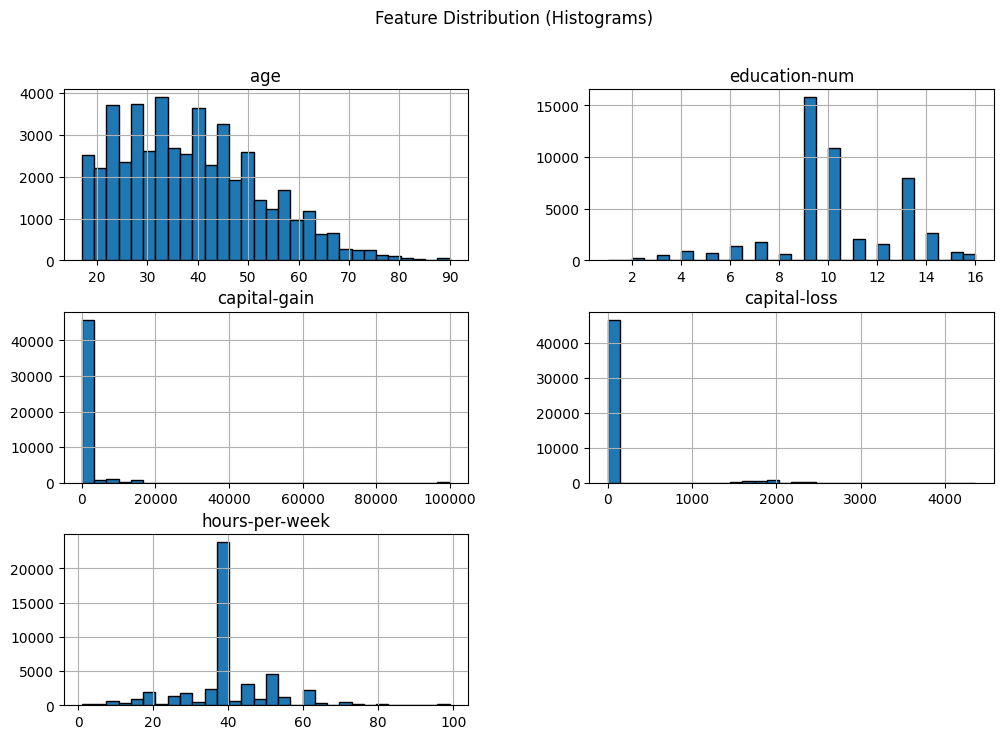

In [31]:
X_copy = X.copy()

numerical_cols = X_copy.select_dtypes(include=['int64', 'float64']).columns.drop("income")

X_copy[numerical_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distribution (Histograms)")
plt.show()


When plotting out the numerical features, I can see that different scale between *age* and *capital-gain* or *capital-loss* or *hours-per-week* and *education-num*.

## **Normalization Techniques**

### Question: *Which normalization techniques should be applied? Why?*

***Min-Max Scaling*** is a normalization technique used to transform feature values into a specific range (sometimes [0, 1] or [-1, 1])

$$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} \times (X_{max\_new} - X_{min\_new} ) + X_{min\_new} $$

where

- $X$ - original feature value
- $X_{min}$ - min value of the feature in the dataset
- $X_{max}$ - max value of the feature in the dataset
- $X_{min\_new}$ and $X_{max\_new}$ - desired new range [0, 1] or [-1, 1]

The ***Min-Max Scaling*** is *USEFUL* because:

- It preserves the relative relationships between values while bounding them
- It is ideal for features with **known**, **bounded ranges**

The ***Min-Max Scaling*** *FAILS* when:
- If a feature contains outliers (extremely large/small values), the entire range gets stretched, and most values get compressed into a tiny part of the range
- Want to change the shape of the distribution (normal distribution)

$\Rightarrow$ **Features** - *age*

In [32]:
def min_max_scaling(column, new_min=0, new_max=1):
    X_min = column.min()
    X_max = column.max()
    return (column - X_min) / (X_max - X_min) * (new_max - new_min) + new_min

X_copy["age"] = min_max_scaling(X_copy["age"])

***Decimal Scaling***  is a normalization technique used to scale feature values by dividing them by a power of 10, ensuring they fall within a smaller range (sometimes [−1,1])

$$X_{scaled} = \frac{X}{10^j} \text{ where } j = \lceil \log_{10}(\max |X|) \rceil$$ 

where

- $X$ - original feature value
- $j$ - the smallest integer such that all scaled values fall within [-1, 1]
- $j$ = $\lceil \log_{10}(\max |X|)\rceil$ which is chosen based on the largest absolute value in the feature
 
The ***Decimal Scaling*** is *USEFUL* because:
- It can handle very large numbers. If a feature has values in the thousands or millions, it can compresses the into a manageable range
- Preserves relative importance when it does not distort the relative differences between values
- Since it only depends on the logarithm of the max absolute value, the outliers do not drastically affect the transformation

The ***Decimal Scaling*** *FAILS* when:
- If the data is highly skewed, it does not make it normally distributed

$\Rightarrow$ **Features** - *capital-gain* and *capital-loss*

In [33]:
def decimal_scaling(column):
    j = np.ceil(np.log10(column.abs().max()))  # Compute scaling factor
    return column / (10 ** j)

X_copy["capital-gain"] = decimal_scaling(X_copy["capital-gain"])
X_copy["capital-loss"] = decimal_scaling(X_copy["capital-loss"])

***Z-score Standardization*** is a normalization technique that transforms data to have mean $\mu$ 0 and a standard deviation $\sigma$ of one

$$X_{normalized} = \frac{X - \mu}{\sigma}$$

where
- $X$ - original feature value
- $\mu$ - mean of the feature
- $\sigma$ - standard deviation of the feature


The ***Z-Score Standardization*** is *USEFUL* because:
- It ensures features have a common scale. For example, if features have different units ('years' vs 'hours'), standardization makes them comparable
- If the feature follows a Gaussian (normal) distribution, it ensures well-scaled dataset
- Compared to ***Min-Max Scaling***, outliers do not squash the range of normal values as much. But, extreme outliers can still affect the mean and standard deviation slightly distorting the transformation


The ***Z-Score Standardization*** *FAILS* when:
- The feature has a highly skewed distribution such as exponential or heavy-tailed distribution
- It does not ensure a fixed range as ***Min-Max Scaling***

$\Rightarrow$ **Features** - *education-num* and *hours-per-week*

In [34]:
def z_score_standardization(column):
    return (column - column.mean()) / column.std()

X_copy["education-num"] = z_score_standardization(X_copy["education-num"])
X_copy["hours-per-week"] = z_score_standardization(X_copy["hours-per-week"])

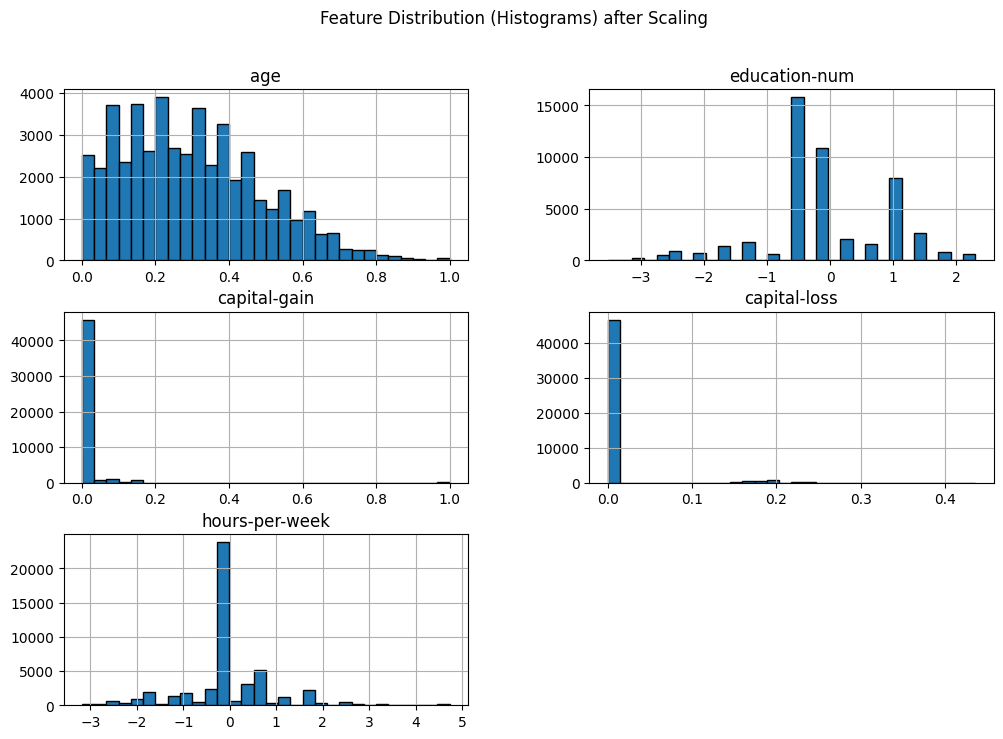

In [35]:
numerical_cols = X_copy.select_dtypes(include=['int64', 'float64']).columns.drop("income")

X_copy[numerical_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distribution (Histograms) after Scaling")
plt.show()


### Question: *Are there any other normalization methods (e.g., Robust Scaling) that can handle outliers effectively?*

***Robust Scaling*** is a normalization technique that transforms data based on median and Interquartile Range (IQR) instead of the mean and standard deviation

$$X_{scaled} = \frac{X - median(X)}{IQR(X)}$$

where
- $X$ - original feature value
- $median(X)$ - median of the feature (50th percentile)
- $IQR(X)$ - interquartile Range (IQR) = $Q_3 - Q_1$

The ***Robust Scaling*** is *USEFUL* because:
- It ignores outliers beyond the IQR
- Most values will be centered around 0 because it subtracts the median
- The IQR denominator ensures that outlier values do not dominate the scaling process
- Works well even if the feature is not normally distributed such as exponential or heavily skewed distributions

The ***Robust Scaling*** *FAILS* when:
-  Data has no outliers [*The Z-score normalization may work better because it considers the entire distribution*]
- It does not bound data to a fixed range so some values may still be relatively large or small

***Log Transformation*** is a technique that reduces skewness and compresses outliers by applying a logarithmic function to the data

$$X_{scaled} = \log(X + c)$$

where
- $X$ - original feature value
- $c$ - a small constant added to avoid issues with $\log(0)$

The ***Log Transformation*** is *USEFUL* because:
- It helps reducing right-skewed distribution and compress outliers

The ***Log Transformation*** *FAILS* when:
- Dataset contains zero, negative values or is already normally distribute

# **Data Discretization**

Data discretization is a preprocessing technique that **transforms continuous data into intervals**.
This step is useful for simplifying data patterns and is often used in machine learning algorithms
that work better with categorical data.

To perform data discretization, let’s address the following questions:

## **Discretization Techniques**

### Question: *Which techniques should be applied for discretization?*

- Binning: Equal-width (distance) partitioning, Equal-depth (frequency) partitioning
- Histogram analysis
- Are there any other methods?

***Equal-width (distance) partitioning*** divides the range of a feature into n *equal-sized* intervals or *fixed-width* bins without considering the target variable

$$Bin Width = \frac{\max(X) - \min(X)}{n}$$

***Equal-depth (frequency) partitioning*** divides the data into $n$ bins and ensure that each bin contains approximately the same number of samples. Doing this method by sorting the data in ascending order and then divide it into $n$ equal-sized groups

***Histogram analysis*** identifies natural groupings in the data instead of using fixed bin sizes by construct a histogram of the feature values and then identify peaks and valleys to define bin boundaries dynamically

### Question: *Are there any other methods?*
- Clustering 
- Entropy-based

***Clustering*** such as K-Means can be used to define bins dynamically by apply K-Means clustering to the feature and then assign cluster labels as discrete categories

***Entropy-based*** uses information gain to determine the best binning strategy by minimizing entropy by compute entropy for different binning scheme and then select the scheme that minimizes information loss

**Conclusion**: As I have used earlier in Feature Section, I believe the most suitable discretization technique for this dataset is Equal-depth (frequency) partitioning

In [36]:
X

,age,education-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,income
0,39,13,never-married,adm-clerical,2174,0,40,0
1,50,13,married-civ-spouse,exec-managerial,0,0,13,0
2,38,9,divorced,handlers-cleaners,0,0,40,0
3,53,7,married-civ-spouse,handlers-cleaners,0,0,40,0
4,28,13,married-civ-spouse,prof-specialty,0,0,40,0
...,...,...,...,...,...,...,...,...
48837,39,13,divorced,prof-specialty,0,0,36,0
48838,64,9,widowed,unknown,0,0,40,0
48839,38,13,married-civ-spouse,prof-specialty,0,0,50,0
48840,44,13,divorced,adm-clerical,5455,0,40,0


# **Reference**

- [Feature selection using a mutual information based measure](https://www.researchgate.net/publication/3974108_Feature_selection_using_a_mutual_information_based_measure)
- [Mutual Information](https://en.wikipedia.org/wiki/Mutual_information) 